In [1]:
%matplotlib inline
import numpy as np
import cv2
from scipy.fftpack import fft, ifft, fftshift, ifftshift
import matplotlib.pyplot as plt
import warnings

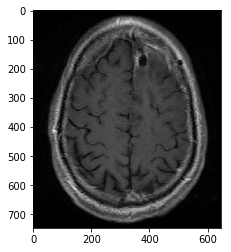

In [2]:
# read a sample MRI image
img = cv2.imread('MR-sample3.png',cv2.IMREAD_GRAYSCALE).astype(float)/255.0

plt.imshow(img,cmap='gray')
plt.show()

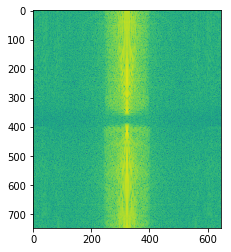

In [3]:
# the k-space
kspace_img = fftshift(fft(img.astype(np.float32)))
plt.imshow(np.log(np.abs(kspace_img)))
plt.show()

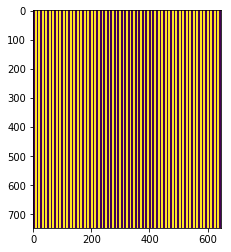

In [4]:
warnings.filterwarnings('ignore')

#k-space sampling
sampling_grid = np.ones(img.shape)
sampling_grid[:,1::2] = 0
plt.imshow(sampling_grid)

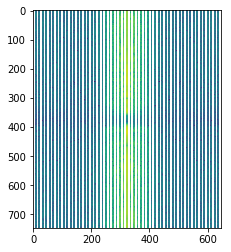

In [5]:
kspace_img_smpled = kspace_img*sampling_grid
#kspace_img_smpled = resized_kspace
plt.imshow(np.log(np.abs(kspace_img_smpled)))

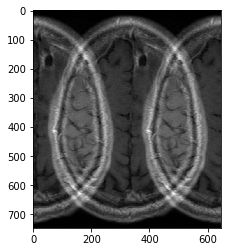

In [6]:
sampled_mri = ifft(ifftshift(kspace_img_smpled))
plt.imshow(np.abs(sampled_mri),cmap='gray')

This artifact is called "aliasing artifact" which is common in MR images if we force to have a specific FOV that our scanner is not capable to have.

<img src="aliasing-artifact-1.png" width=240>